In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random

In [23]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
#matplotlib.rcParams['font.size']=45
#matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.family']= 'ptm' #'Times New Roman'

/var/folders/t4/p3rsq6254flg_bnmk_p_xgkw0000gn/T/ipykernel_36261/2246194590.py:2: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [25]:
marginList = [0.07,0.15,0.3]
epsilons = [0.0, 8/255, 16/255, 36/255, 0.3, 0.5, 0.6, 0.8, 1.0]
#index_keep = [0,2,3,4,5,-1]
index_keep = np.arange(len(epsilons))

In [26]:
res = np.zeros((len(marginList),len(epsilons)))

In [27]:
rob_accuracy_Baseline = np.zeros_like(res)
for i, margin in enumerate(marginList):
    rob_accuracy_Baseline[i] = np.loadtxt(f"Baseline/cif100_txtFile{margin}_Baseline.txt")
rob_accuracy_Baseline = rob_accuracy_Baseline[:,index_keep]

In [28]:
res_contractive = np.zeros_like(res)
for i, margin in enumerate(marginList):
    res_contractive[i] = np.loadtxt(f"Contractive/updateMargin_{margin}.txt")
res_contractive = res_contractive[:,index_keep]

In [29]:
rob_accuracy_naive = np.zeros_like(res)
for i, margin in enumerate(marginList):
    rob_accuracy_naive[i] = np.loadtxt(f"NaiveApproach/txtFile_naive_{margin}.txt")

rob_accuracy_naive = rob_accuracy_naive[:,index_keep]

In [30]:
rob_accuracy_switch_prescribed = np.zeros_like(res)
for i, margin in enumerate(marginList):
    rob_accuracy_switch_prescribed[i] = np.loadtxt(f"Switch prescribed/Cifar100_updateMargin_{margin}.txt")

rob_accuracy_switch_prescribed = rob_accuracy_switch_prescribed[:,index_keep]

In [31]:
rob_accuracy_switch_flexible = np.zeros_like(res)
for i, margin in enumerate(marginList):
    rob_accuracy_switch_flexible[i] = np.loadtxt(f"Switch flexible/updateMargin_{margin}.txt")

rob_accuracy_switch_flexible = rob_accuracy_switch_flexible[:,index_keep]

In [32]:
epsilons = np.array(epsilons)[index_keep]

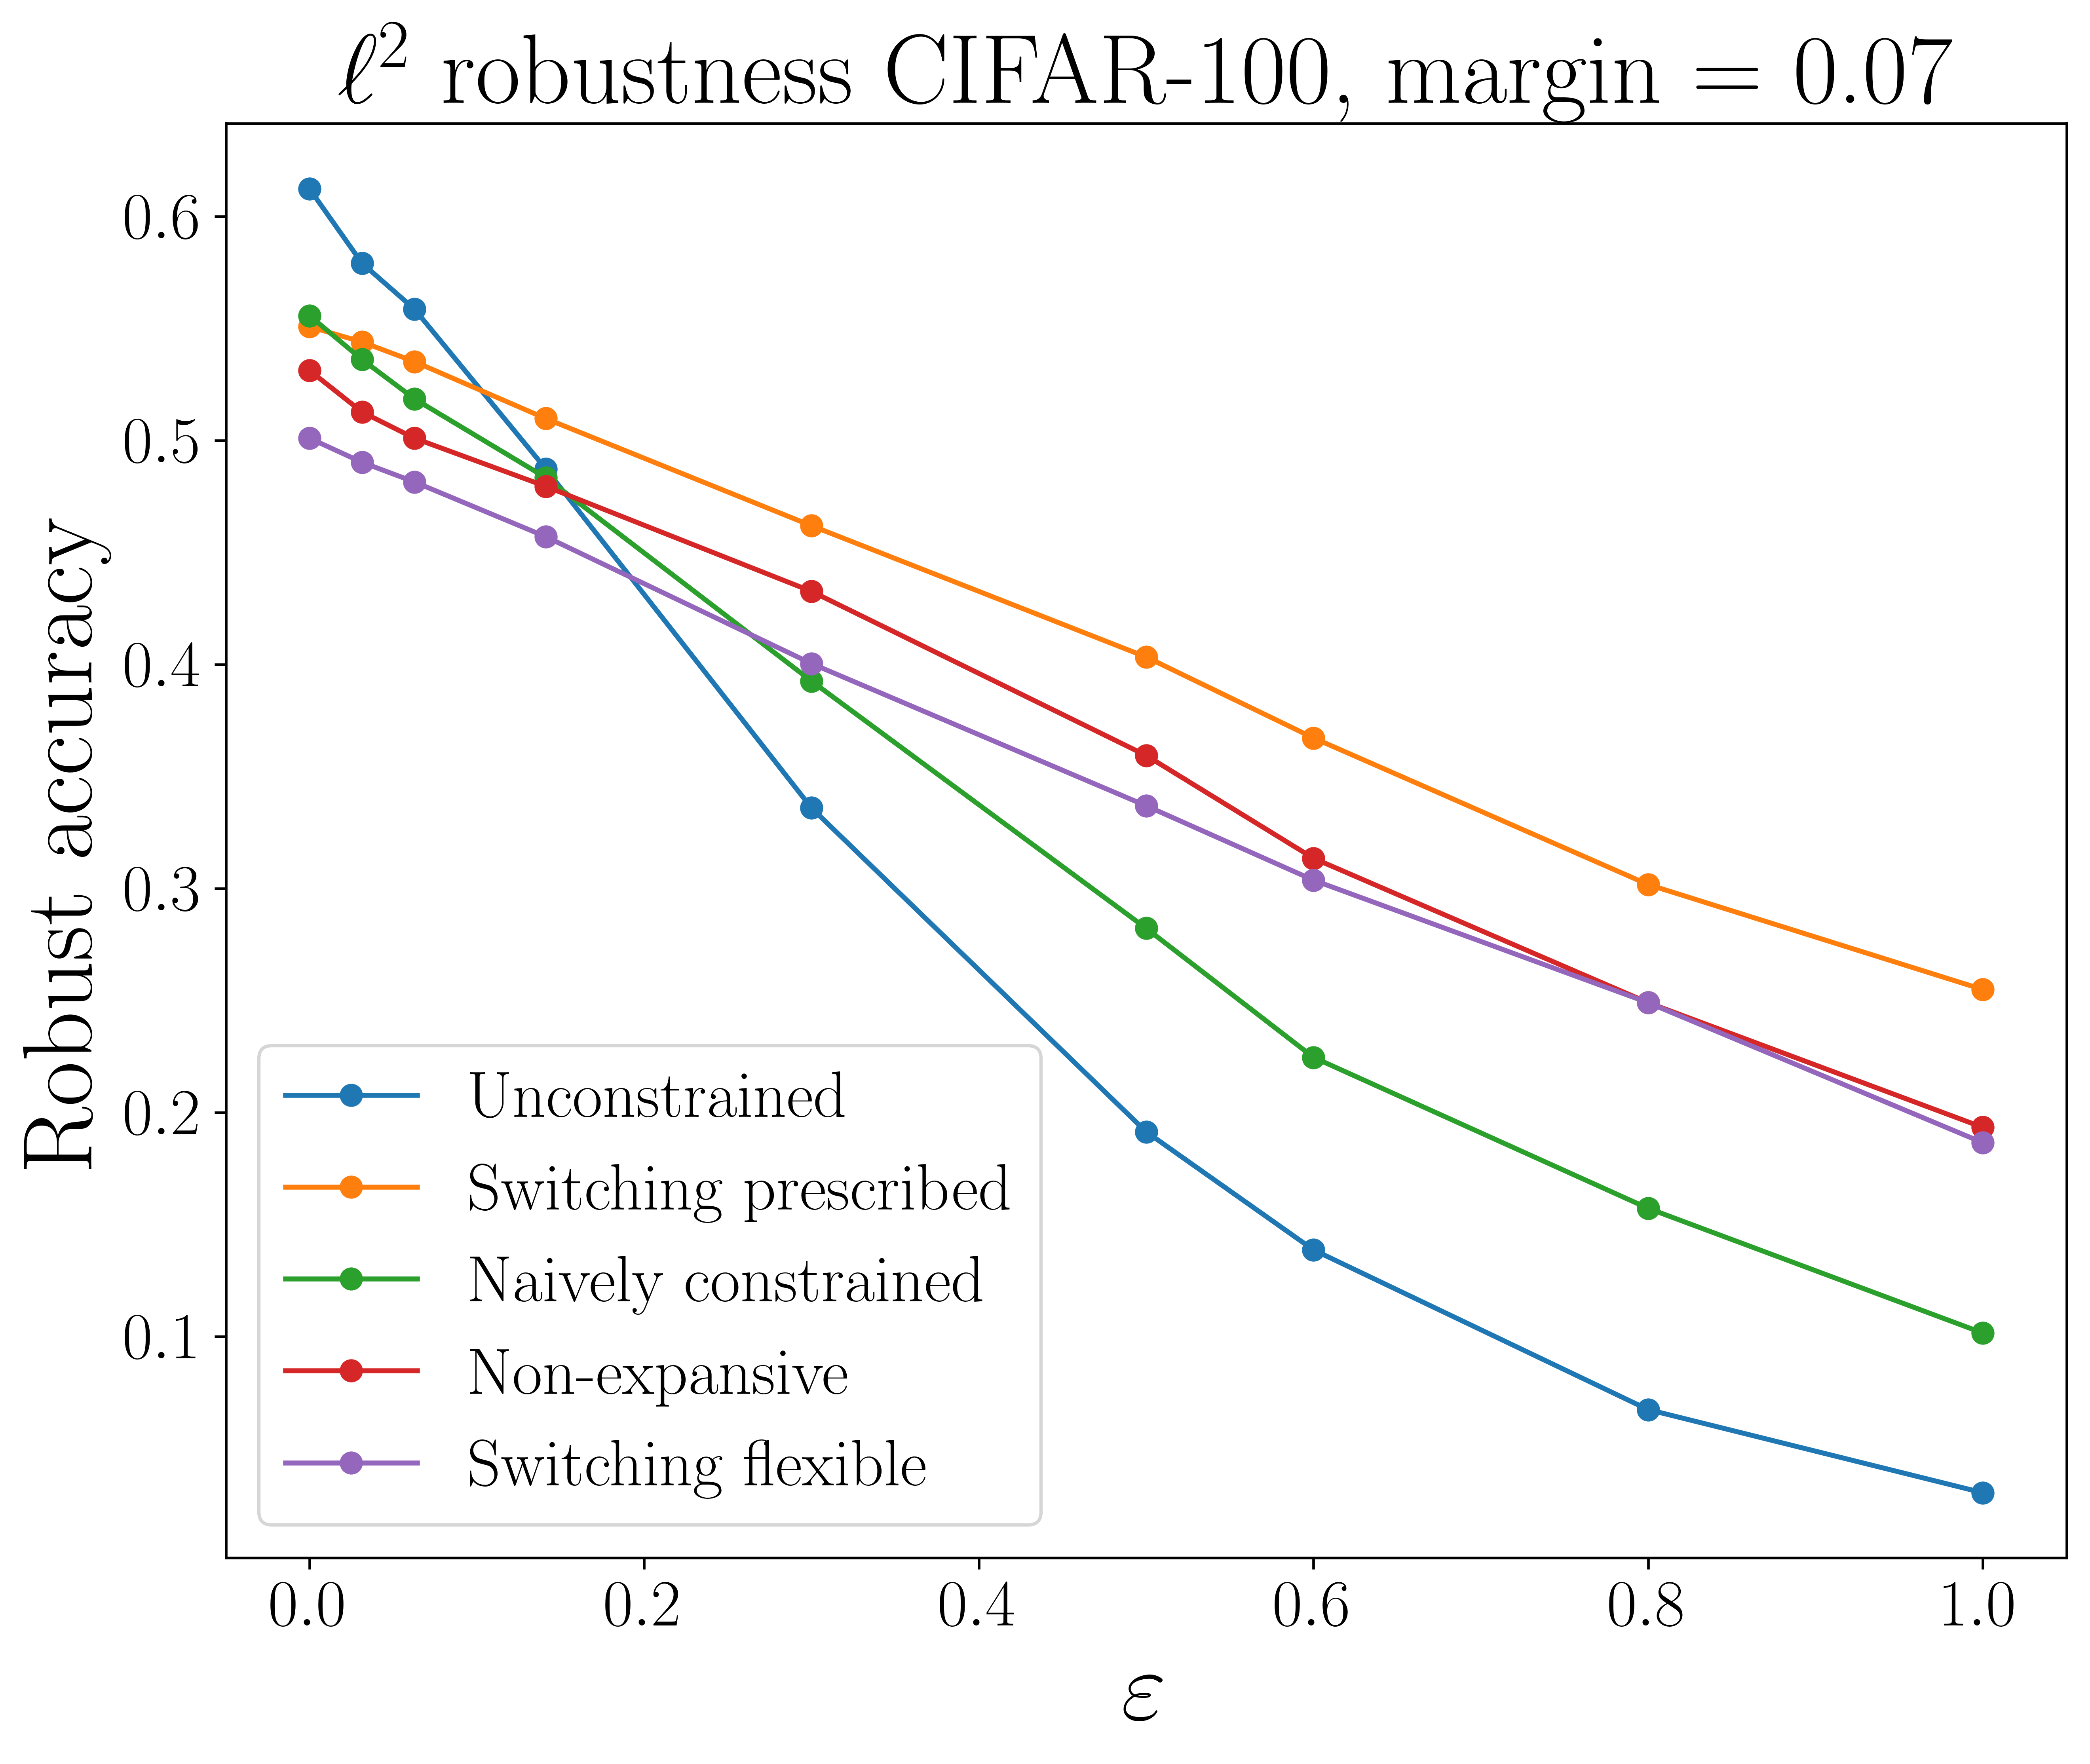

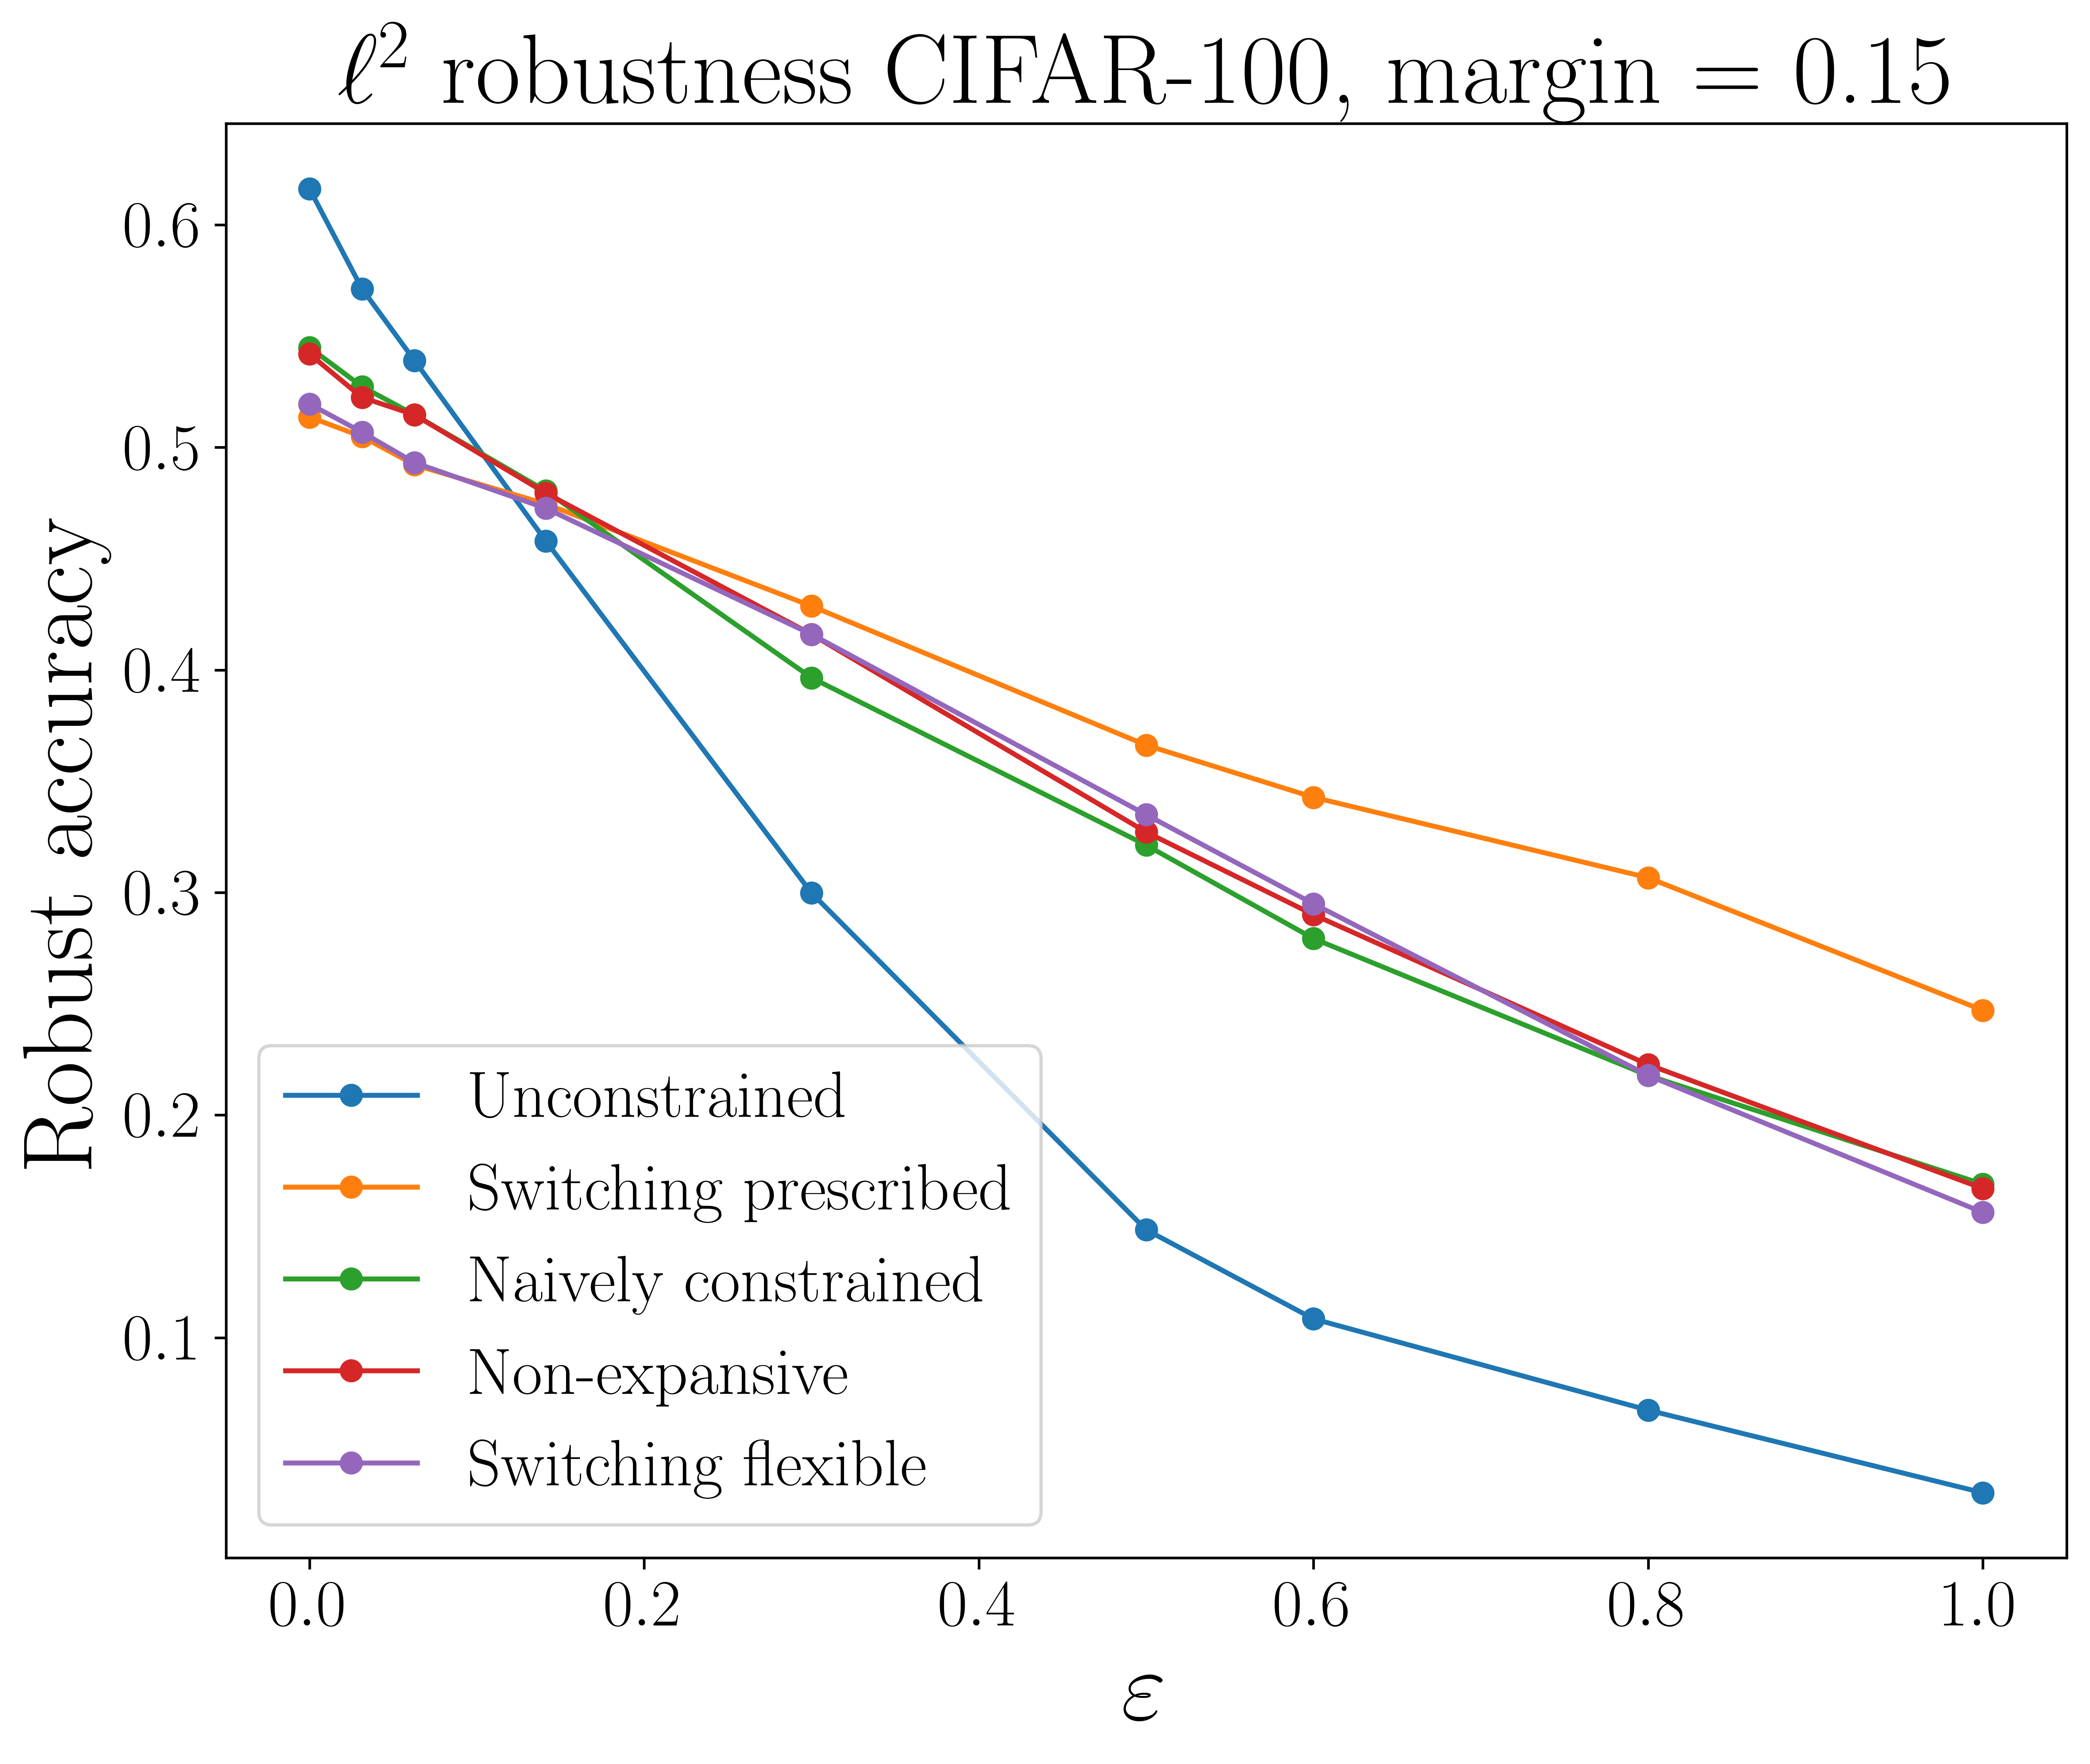

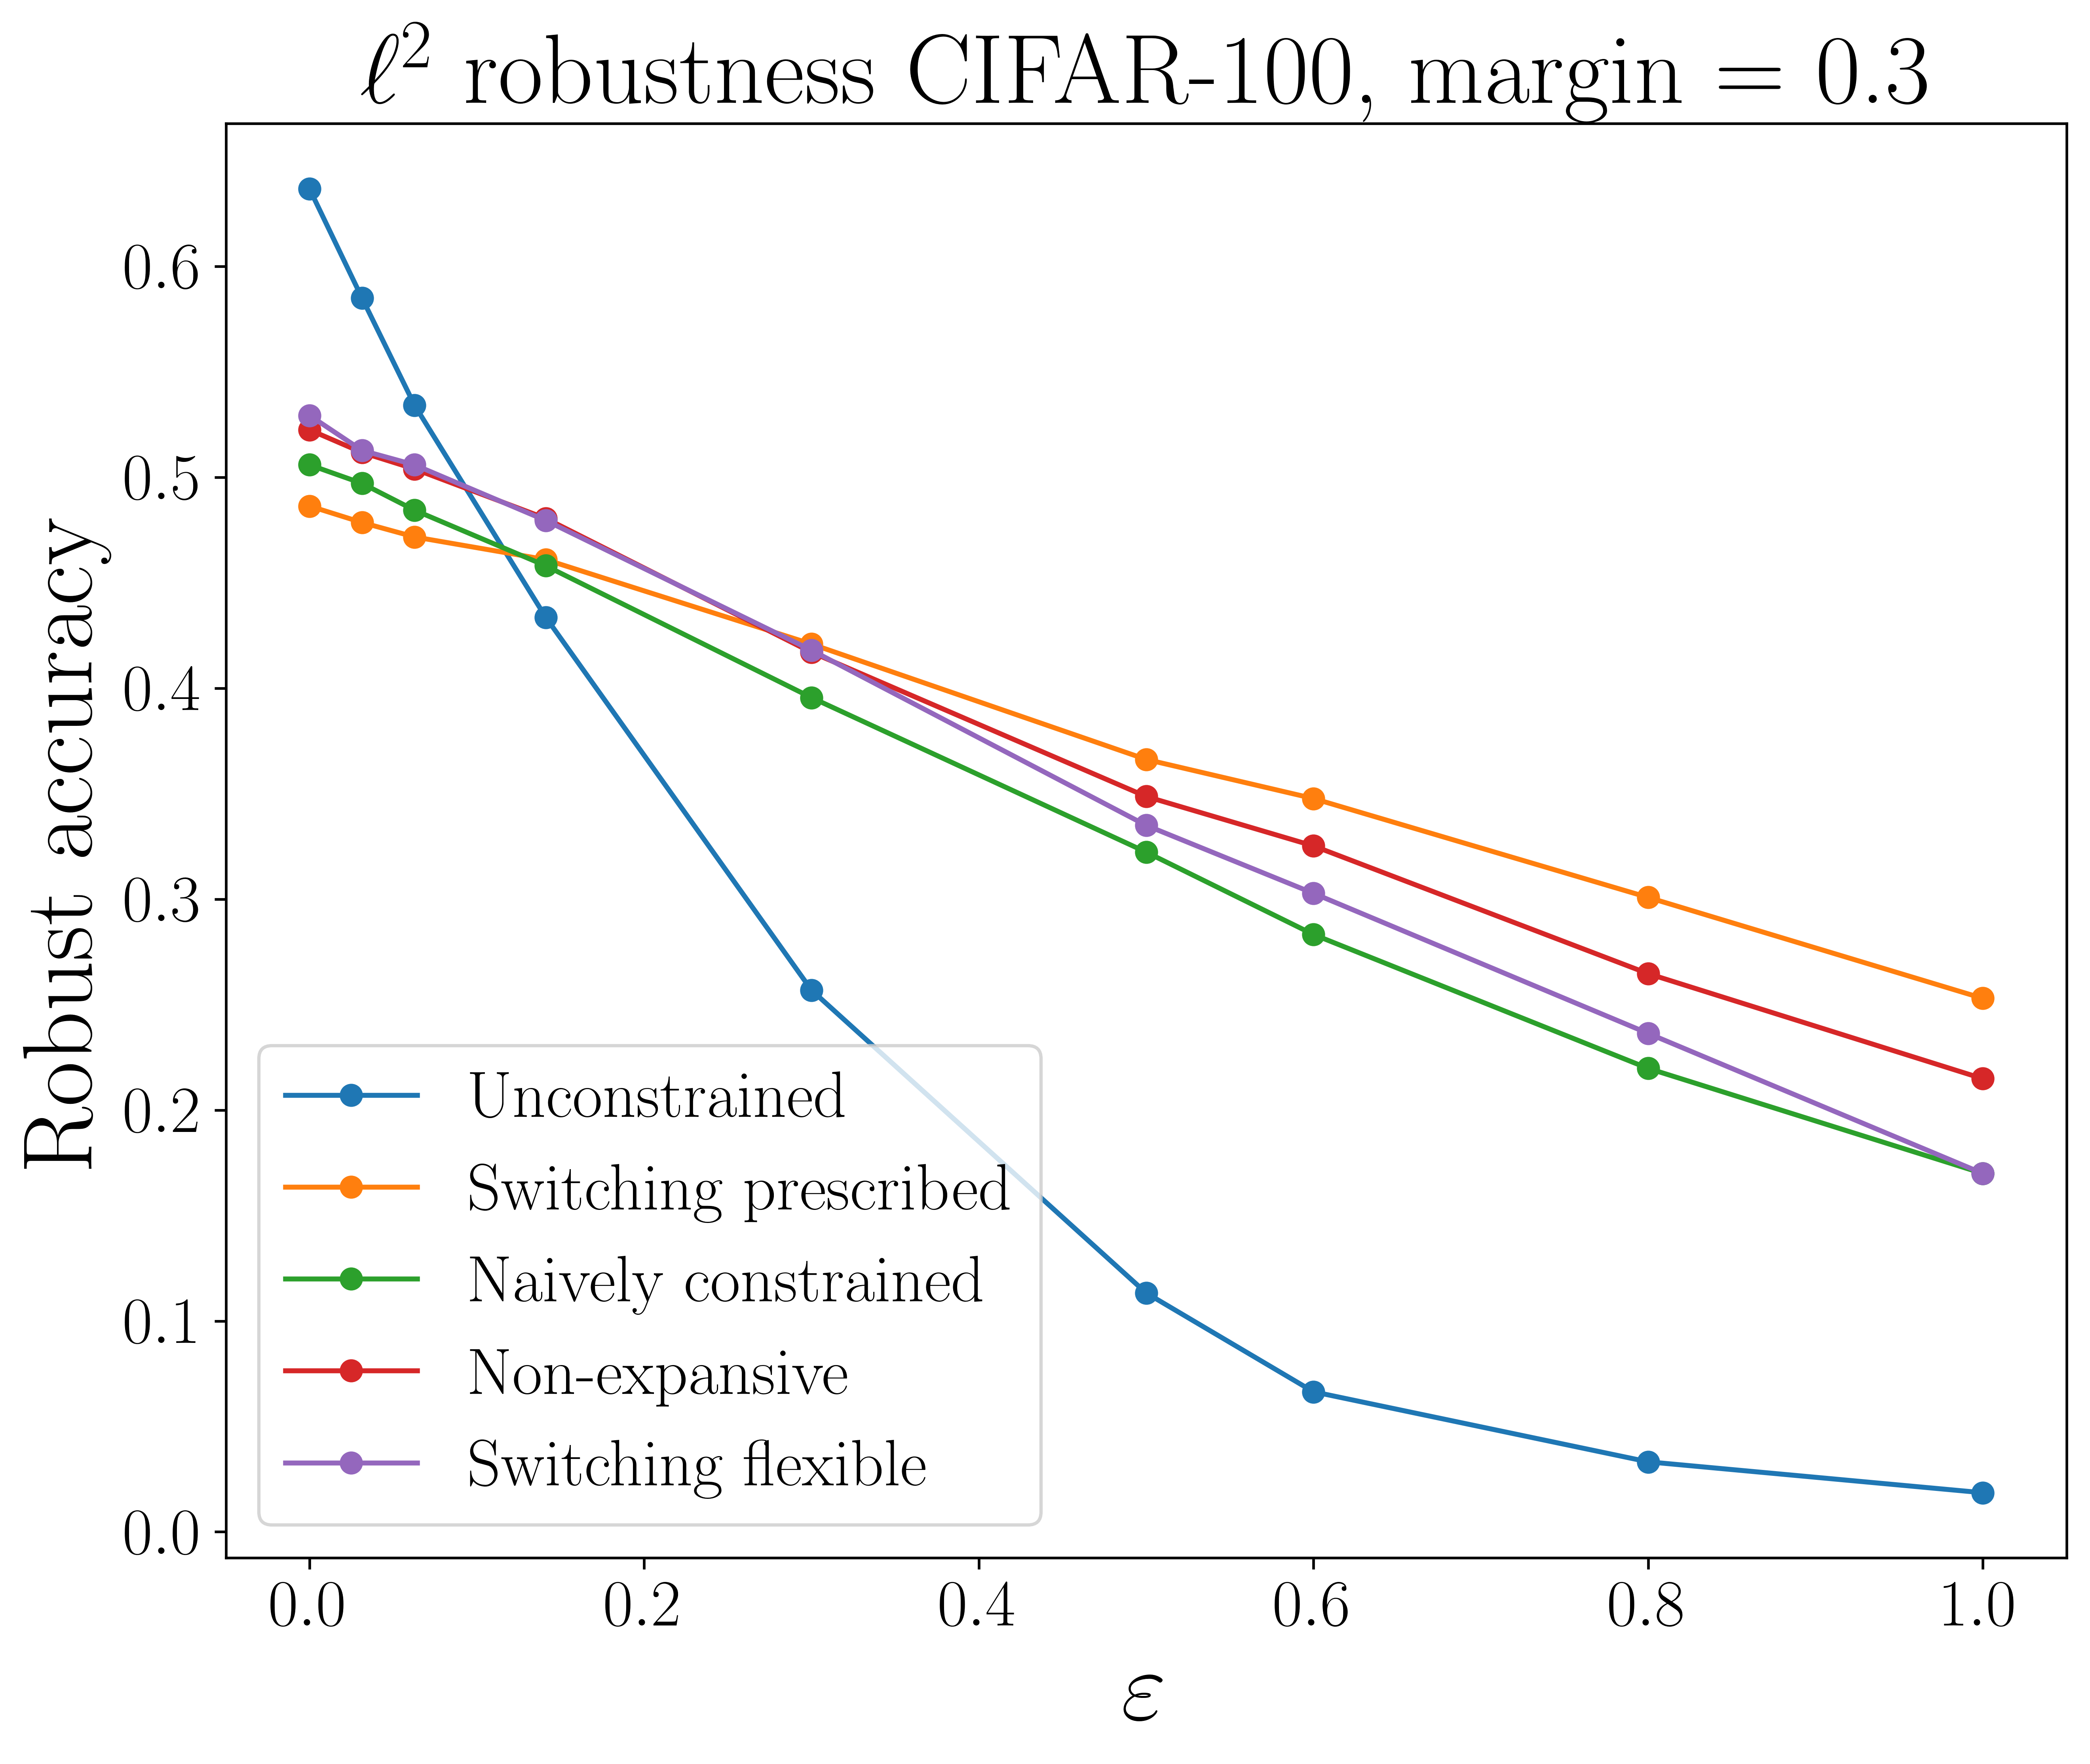

In [33]:
## Plot constrained networks
for i in range(len(marginList)):
    fig = plt.figure(figsize=(10,8),dpi=600)
    plt.plot(epsilons,rob_accuracy_Baseline[i],'-o',label=f"Unconstrained")
    plt.plot(epsilons,rob_accuracy_switch_prescribed[i,index_keep],'-o',label=f"Switching prescribed")
    plt.plot(epsilons,rob_accuracy_naive[i],'-o',label=f"Naively constrained")
    plt.plot(epsilons,res_contractive[i],'-o',label=f"Non-expansive")
    plt.plot(epsilons,rob_accuracy_switch_flexible[i,index_keep],'-o',label=f"Switching flexible")
        
    plt.xlabel(r"$\varepsilon$",fontsize=30)
    plt.ylabel("Robust accuracy",fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20,loc="lower left")

    plt.title(fr"$\ell^2$ robustness CIFAR-100, margin = {marginList[i]}",fontsize=30);
    plt.savefig(f"Robustness_CIFAR100_margin={marginList[i]}.pdf",bbox_inches='tight')
    plt.show()

In [34]:
from pandas import DataFrame as df

In [35]:
epsilons

array([0.        , 0.03137255, 0.0627451 , 0.14117647, 0.3       ,
       0.5       , 0.6       , 0.8       , 1.        ])

In [36]:
names = ["U","NC","NE","SF","SP"]

matrices = [rob_accuracy_Baseline, 
            rob_accuracy_naive, 
            res_contractive,
            rob_accuracy_switch_flexible,
            rob_accuracy_switch_prescribed]

robustness_dict = {'Margin 0.07' : [matrices[i][0] for i in range(len(matrices))],
                     'Margin 0.15' : [matrices[i][1] for i in range(len(matrices))],
                     'Margin 0.30' : [matrices[i][2] for i in range(len(matrices))]
                     }

In [37]:
total_tensor = df()

total_tensor["Eps"] = np.round(epsilons,3)

for i in range(len(marginList)):
    for j in range(len(matrices)):
        total_tensor[f"{names[j]} {marginList[i]}"] = np.round(matrices[j][i],10)

In [38]:
def highlight_max(data, color='green'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return df(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

res = total_tensor.iloc[:,1:].style.apply(highlight_max,axis=1)

In [39]:

print(total_tensor.iloc[:,-8:].to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
 NE 0.15 &  SF 0.15 &  SP 0.15 &    U 0.3 &   NC 0.3 &   NE 0.3 &   SF 0.3 &   SP 0.3 \\
\midrule
0.541992 & 0.519531 & 0.513672 & 0.636719 & 0.505859 & 0.522461 & 0.529297 & 0.486328 \\
0.522461 & 0.506836 & 0.504883 & 0.584961 & 0.497070 & 0.511719 & 0.512695 & 0.478516 \\
0.514648 & 0.493164 & 0.492188 & 0.534180 & 0.484375 & 0.503906 & 0.505859 & 0.471680 \\
0.479492 & 0.472656 & 0.474609 & 0.433594 & 0.458008 & 0.480469 & 0.479492 & 0.460938 \\
0.416016 & 0.416016 & 0.428711 & 0.256836 & 0.395508 & 0.416992 & 0.417969 & 0.420898 \\
0.327148 & 0.334961 & 0.366211 & 0.113281 & 0.322266 & 0.348633 & 0.334961 & 0.366211 \\
0.290039 & 0.294922 & 0.342773 & 0.066406 & 0.283203 & 0.325195 & 0.302734 & 0.347656 \\
0.222656 & 0.217773 & 0.306641 & 0.033203 & 0.219727 & 0.264648 & 0.236328 & 0.300781 \\
0.166992 & 0.156250 & 0.247070 & 0.018555 & 0.169922 & 0.214844 & 0.169922 & 0.252930 \\
\bottomrule
\end{tabular}



/var/folders/t4/p3rsq6254flg_bnmk_p_xgkw0000gn/T/ipykernel_36261/1570367821.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(total_tensor.iloc[:,-8:].to_latex(index=False))


In [40]:
res

,U 0.07,NC 0.07,NE 0.07,SF 0.07,SP 0.07,U 0.15,NC 0.15,NE 0.15,SF 0.15,SP 0.15,U 0.3,NC 0.3,NE 0.3,SF 0.3,SP 0.3
0,0.612305,0.555664,0.531250,0.500977,0.550781,0.616211,0.544922,0.541992,0.519531,0.513672,0.636719,0.505859,0.522461,0.529297,0.486328
1,0.579102,0.536133,0.512695,0.490234,0.543945,0.571289,0.527344,0.522461,0.506836,0.504883,0.584961,0.497070,0.511719,0.512695,0.478516
2,0.558594,0.518555,0.500977,0.481445,0.535156,0.539062,0.514648,0.514648,0.493164,0.492188,0.534180,0.484375,0.503906,0.505859,0.471680
3,0.487305,0.483398,0.479492,0.457031,0.509766,0.458008,0.480469,0.479492,0.472656,0.474609,0.433594,0.458008,0.480469,0.479492,0.460938
4,0.335938,0.392578,0.432617,0.400391,0.461914,0.299805,0.396484,0.416016,0.416016,0.428711,0.256836,0.395508,0.416992,0.417969,0.420898
5,0.191406,0.282227,0.359375,0.336914,0.403320,0.148438,0.321289,0.327148,0.334961,0.366211,0.113281,0.322266,0.348633,0.334961,0.366211
6,0.138672,0.224609,0.313477,0.303711,0.367188,0.108398,0.279297,0.290039,0.294922,0.342773,0.066406,0.283203,0.325195,0.302734,0.347656
7,0.067383,0.157227,0.249023,0.249023,0.301758,0.067383,0.217773,0.222656,0.217773,0.306641,0.033203,0.219727,0.264648,0.236328,0.300781
8,0.030273,0.101562,0.193359,0.186523,0.254883,0.030273,0.168945,0.166992,0.156250,0.247070,0.018555,0.169922,0.214844,0.169922,0.252930


In [41]:
def computeAUC(epsilons,accuracies,normalize=False):
    area = 0.
    for i in range(len(epsilons)-1):
        deps = epsilons[i+1]-epsilons[i]
        area += 0.5 * deps * (accuracies[i]+accuracies[i+1])
    if normalize:
        return area / accuracies[0]
    else:
        return area

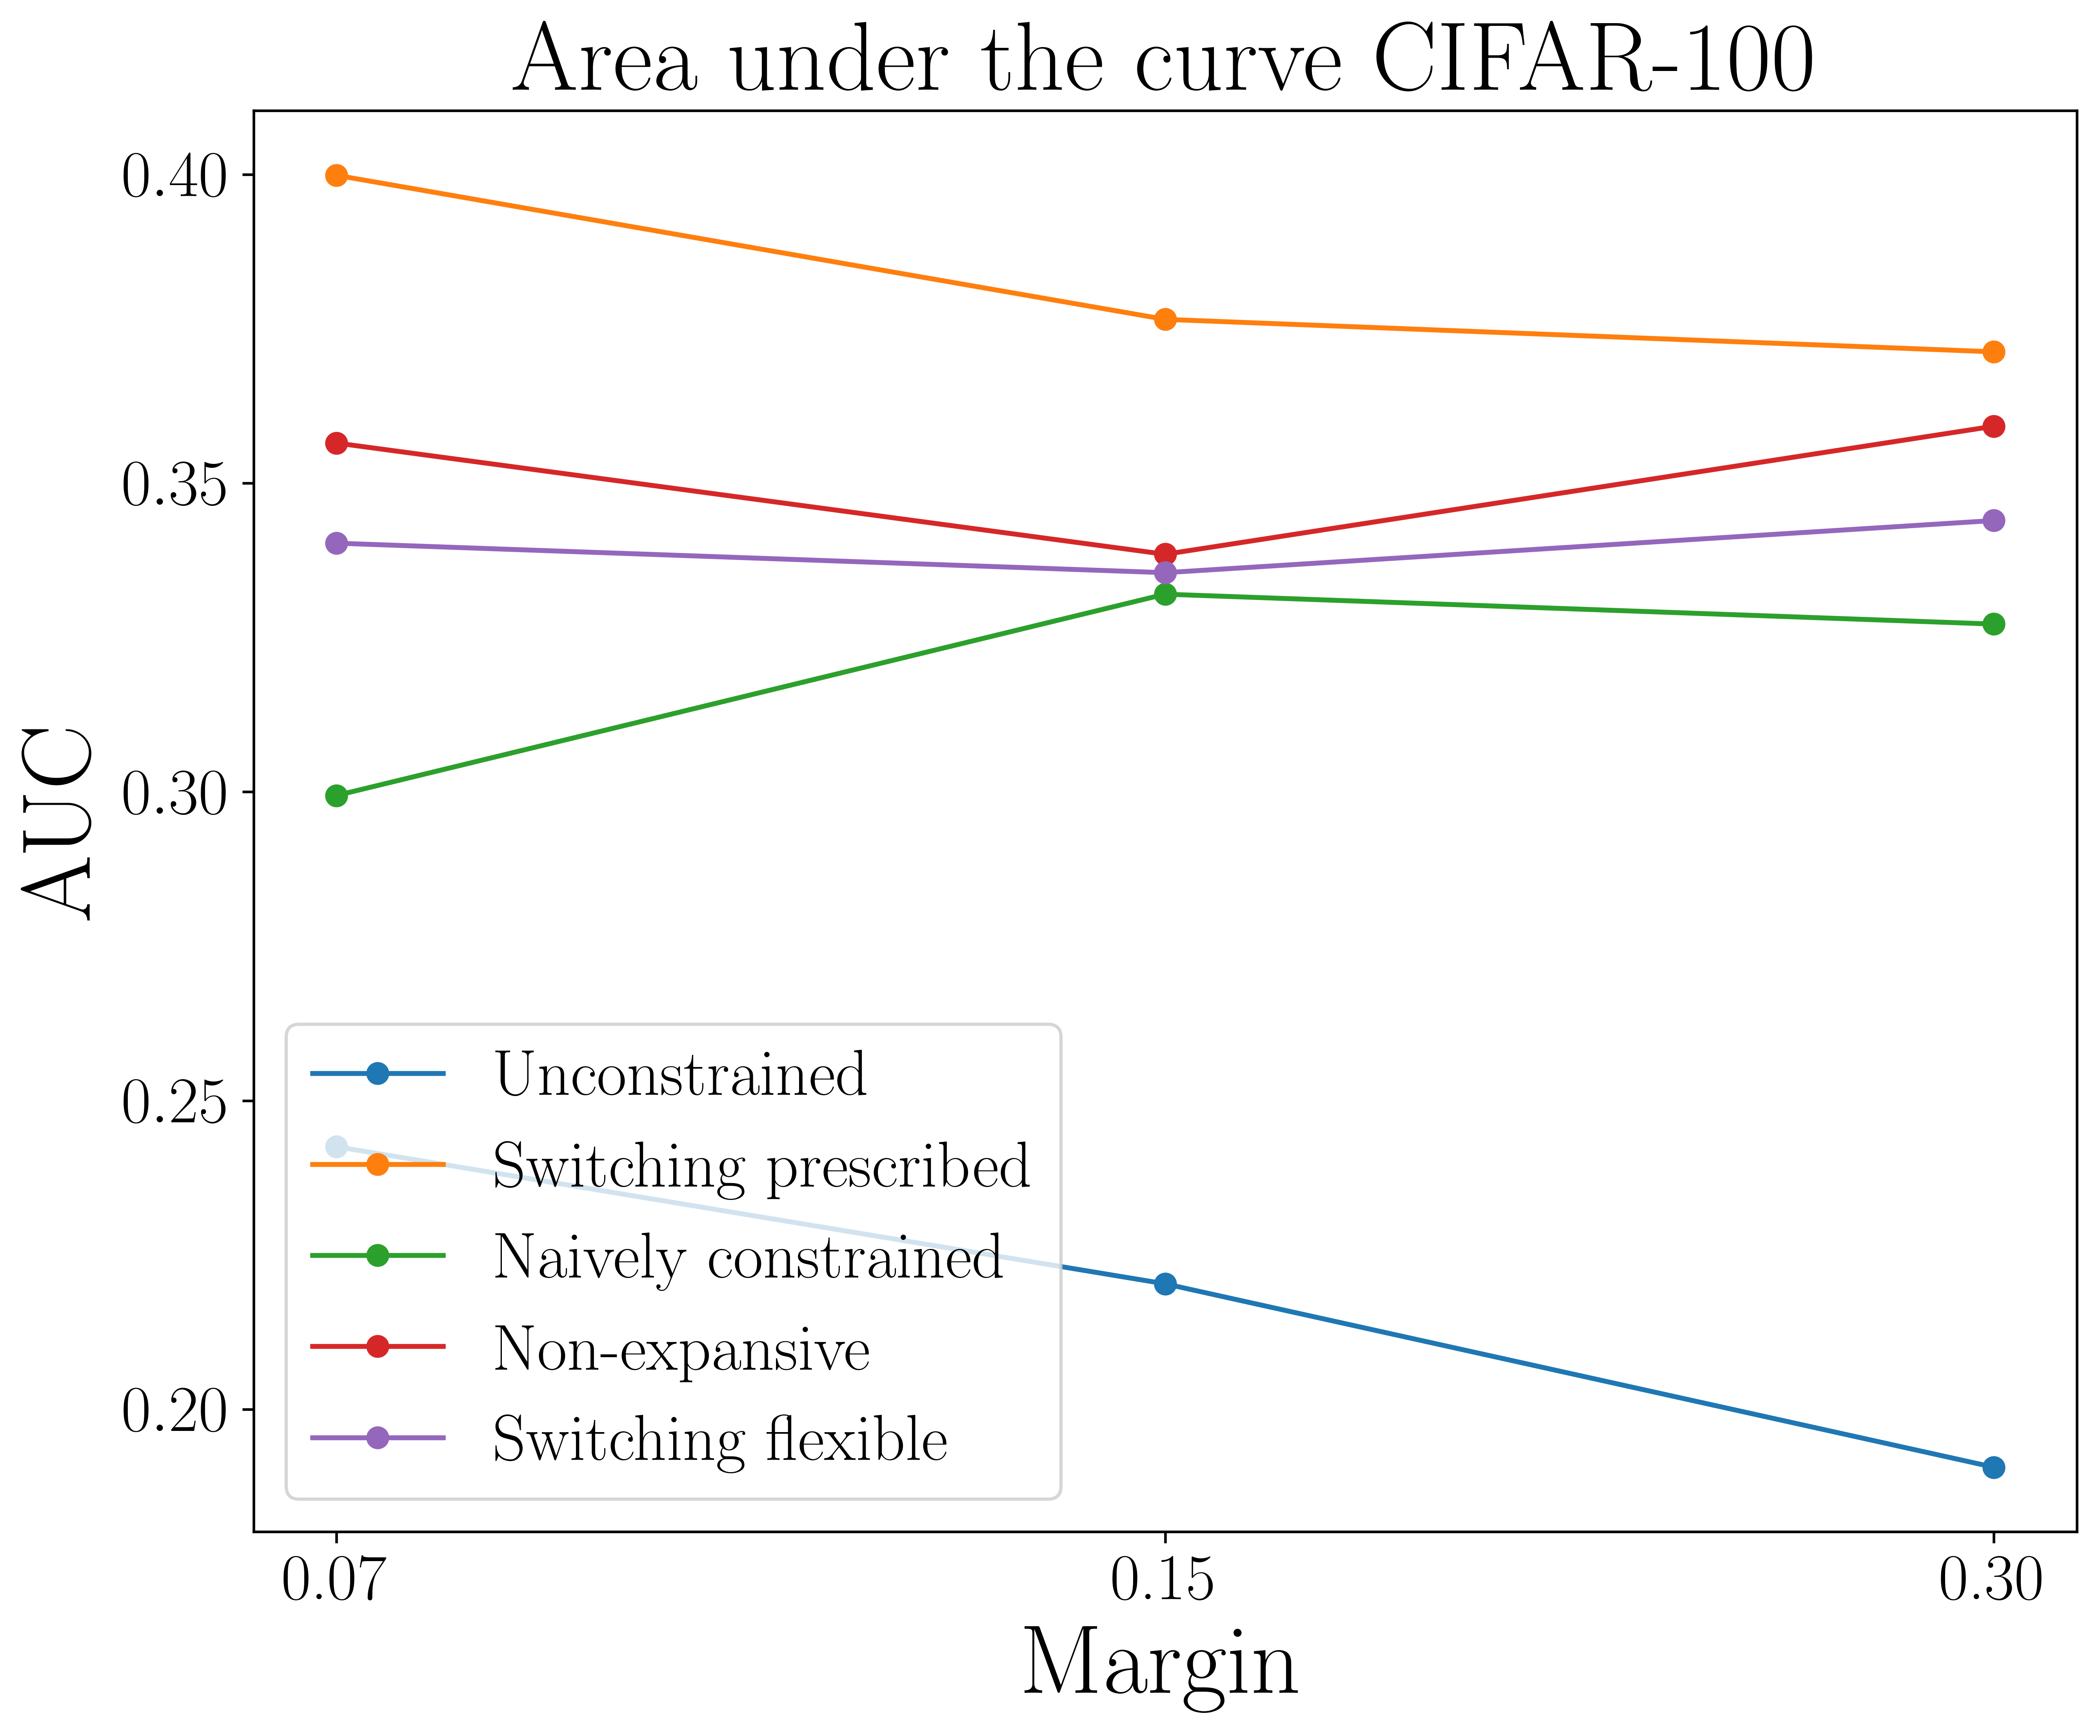

In [42]:
listaBaseline = []
listaPrescribed = []
listaContractive = []
listaFlexible = []
listaNaive = []
for k in range(len(marginList)):
    listaBaseline.append(computeAUC(epsilons,rob_accuracy_Baseline[k]))
    listaPrescribed.append(computeAUC(epsilons,rob_accuracy_switch_prescribed[k]))
    listaNaive.append(computeAUC(epsilons,rob_accuracy_naive[k]))
    listaContractive.append(computeAUC(epsilons,res_contractive[k]))
    listaFlexible.append(computeAUC(epsilons,rob_accuracy_switch_flexible[k]))
  
fig = plt.figure(dpi=600,figsize=(10,8))  
plt.plot(listaBaseline,'-o',label="Unconstrained")
plt.plot(listaPrescribed,'-o',label="Switching prescribed")
plt.plot(listaNaive,'-o',label="Naively constrained")
plt.plot(listaContractive,'-o',label="Non-expansive")
plt.plot(listaFlexible,'-o',label="Switching flexible")
plt.xticks([0, 1, 2], ['0.07', '0.15', '0.30'])
plt.xlabel("Margin",fontsize=30)
plt.legend(fontsize=20)
plt.ylabel("AUC",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),
#          ncol=1, fancybox=True, shadow=True)
plt.title("Area under the curve CIFAR-100",fontsize=30)
plt.savefig("AUC_100.pdf",bbox_inches='tight')
plt.show();